In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        pred = np.zeros((len(X),1),dtype=int)
        return pred
    
digits = load_digits()

y = (digits.target==7).astype(int)

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [25]:
cnt = {}
for x in digits.target:
    if x in cnt:
        cnt[x] += 1
    else:
        cnt[x] = 1
cnt

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

Text(0, 0.5, 'number of data')

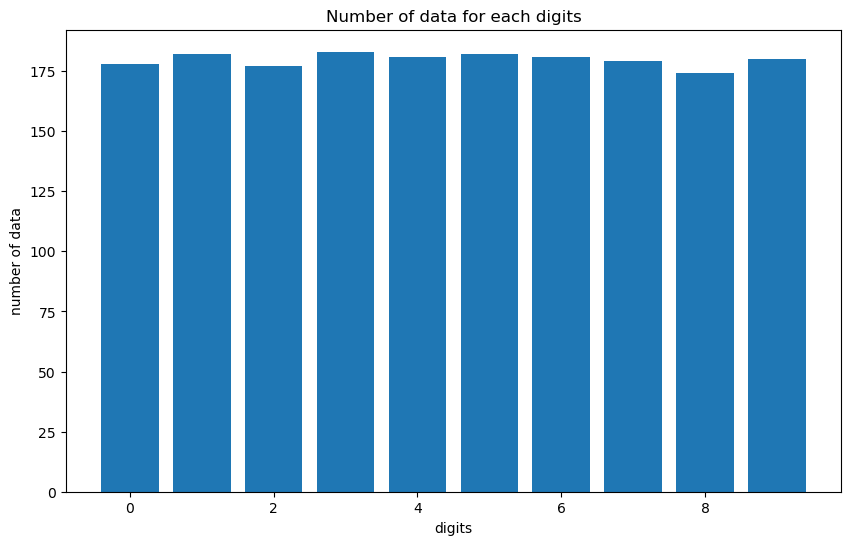

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
x_ = list(cnt.keys())
y_ = list(cnt.values())
plt.bar(x_, y_)
plt.title("Number of data for each digits")
plt.xlabel('digits')
#plt.xticks(rotation=30)
plt.ylabel('number of data')

## 위를 보면 데이터 불균형이 심하지 않다.    
그치만, 이를 이진 분류로 그냥 나눈다면?

Text(0, 0.5, 'number of data')

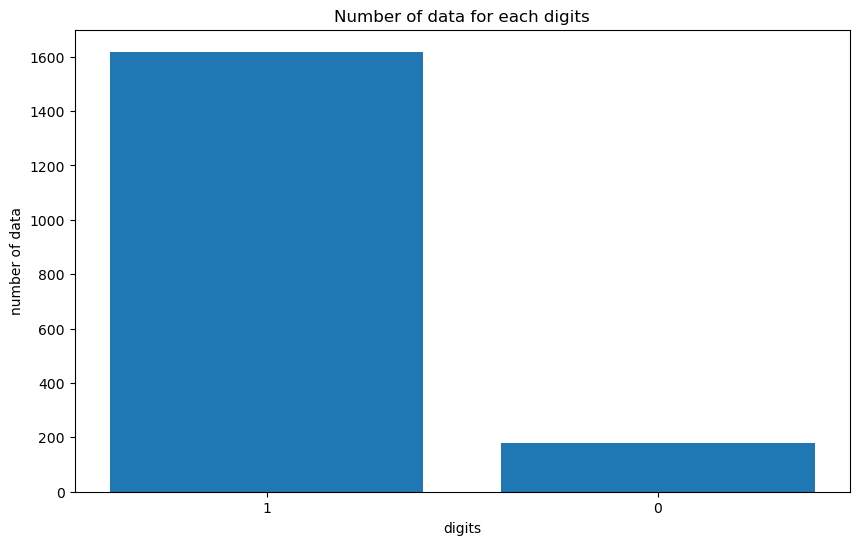

In [31]:
plt.figure(figsize=(10,6))

x_ = [1,0]
y_ = [0,0]
for x in cnt:
    if x==7:
        y_[0] += cnt[x]
    else:
        y_[1] += cnt[x]
plt.bar(x_, y_)
plt.title("Number of data for each digits")
plt.xlabel('digits')
plt.xticks(range(len(x_)), x_)
#plt.xticks(rotation=30)
plt.ylabel('number of data')

## 그냥 나누면 7이 아닌 값들이 너무 많아지기에, 제대로 된 결과를 뽑지 못한다

In [13]:
print(f'레이블 테스트 세트 크기: {y_test.shape}')
print(f'테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)

fakepred = fakeclf.predict(X_test)
print(f'모든 예측을 0으로 했는데, 결과는 : {accuracy_score(y_test, fakepred):.4f}')

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 했는데, 결과는 : 0.9000


## Confusion matrix: TN, FP, FN, TP

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

In [35]:
# accuracy = (TN + TP) / (TN + FP + FN + TP)
accuracy = (405 + 0) / (405+0+45+0)
print(f"confusion matrix에서 얻은 accuracy: {accuracy}")

confusion matrix에서 얻은 accuracy: 0.9


## 정밀도 & 재현율

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'accuracy: {accuracy:.2f}, 정밀도: {precision:.2f}, 재현율: {recall:.2f}')